In [56]:
# name -> number definitionss
tl_pool = [64, 256, 2048]
bs_pool = [4,8,16]
al_pool = [1.1, 1.15, 1.20, 1.25]
al_string_pool = ["1.10", "1.15", "1.2", "1.25"]
cap_pool = [1, 1000000]
data_from_index_array = []

def build_data_from_index() :
    global data_from_index_array
    data_from_index_array[:] = []
    for bs in bs_pool :
        for tl in tl_pool :
            for al in range(len(al_pool)) :
                for cap in cap_pool :
                    name = "_TL" + str(tl) + "_BS" + str(bs) + "_al" + al_string_pool[al] + "_cap" + str(cap)
                    data_from_index_array.append((name, tl, bs, al_pool[al], cap))

def get_index (tl, bsize, alpha, cap) :
    temp  = 0
    block0 = len(tl_pool) * len(al_pool) * len(cap_pool)
    block1 = len(al_pool) * len(cap_pool)
    block2 = len(cap_pool)
    
    for tbs in bs_pool :
        if (tbs == bsize) :
            for ttl in tl_pool :
                if (ttl == tl) :
                    for tal in al_pool :
                        if (tal == alpha) :
                            for tcap in cap_pool :
                                if (tcap == cap) :
                                    return temp;
                                else : temp += 1;
                        else : temp += block2;
                else : temp += block1;
        else : temp += block0;
    return 6666666666        
    

def get_data_from_index( idx ) :
    return data_from_index_array[ idx ];

def n_tests() :
    return len(data_from_index_array)

In [57]:
import pandas as pd
from os import walk

def load_hist(file, col) :
    return pd.read_csv(file, sep = '\\s+', names = col,
                      skiprows = 1, comment = '#', skip_blank_lines = True)

folder = "../outn/"
suffix = ".dist"

c4  = ["tab", "0", "1", "2", "3", "4", "used", "space"]
c8  = ["tab", "0", "1", "2", "3", "4", 
       "5", "6", "7", "8", "used", "space"]
c16 = ["tab", "0", "1", "2", "3", "4", 
       "5", "6", "7", "8", "9", "10", 
       "11", "12", "13", "14", "15", "16", "used", "space"]



build_data_from_index()
print n_tests()

bfs = []
rwalk = []
rwalkcyc = []

for idx in range(n_tests()) :
    (name,tl,bs,al,cap)= get_data_from_index( idx )
    columns = []
    if (bs == 4)  : columns.extend(c4);
    if (bs == 8)  : columns.extend(c8);
    if (bs == 16) : columns.extend(c16);
    bfs.append(load_hist(folder+"bfs"+name+suffix, columns))
    rwalk.append(load_hist(folder+"rwalk"+name+suffix, columns))
    rwalkcyc.append(load_hist(folder+"rwalkcyc"+name+suffix, columns))

72


In [58]:
cs4  = ["space", "used", "4", "3", "2", "1", "0"]
cs8  = ["space", "used", "8", "7", "6", "5", "4", "3", "2", "1", "0"]
cs16 = ["space", "used", "16", "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"]

cc4   = [(1,1,1), (0,1,0), (0,0.8,0), (0,0.5,0), (1,1,0), (1,0,0)]
cc8   = [(1,1,1), (0,1,0), (0,0.8,0), (0,0.5,0), (1,1,0), (1,0,0)]
cc16  = [(1,1,1), (0,1,0), (0,0.8,0), (0,0.5,0), (1,1,0), (1,0,0)]

def get_bs_vectors (idx) :
    bs = get_data_from_index(idx)[2]
    if (bs == 4) : return (cs4 , cc4);
    if (bs == 8) : return (cs8 , cc8);
    if (bs == 16): return (cs16, cc16);

In [59]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

def plot (ax, data, idx, name) :
    (sections, colors) = get_bs_vectors(idx);
    for (s,c) in zip(sections, colors) :
        plt.bar(range(len(data[sections[0]])), data[s], .7, color=c)

8


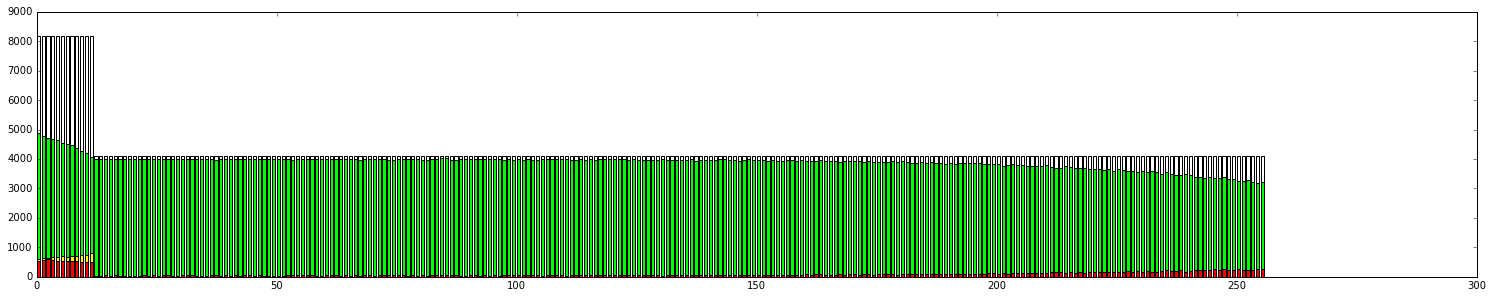

In [60]:
fig = plt.figure( figsize=(25,4.6) )
ax  = fig.add_axes( [0.1, 0.15, 0.8, 0.8] )

idx = get_index(256, 4, 1.1, 1)

plot(ax, bfs[idx], idx, "name")

print idx


9


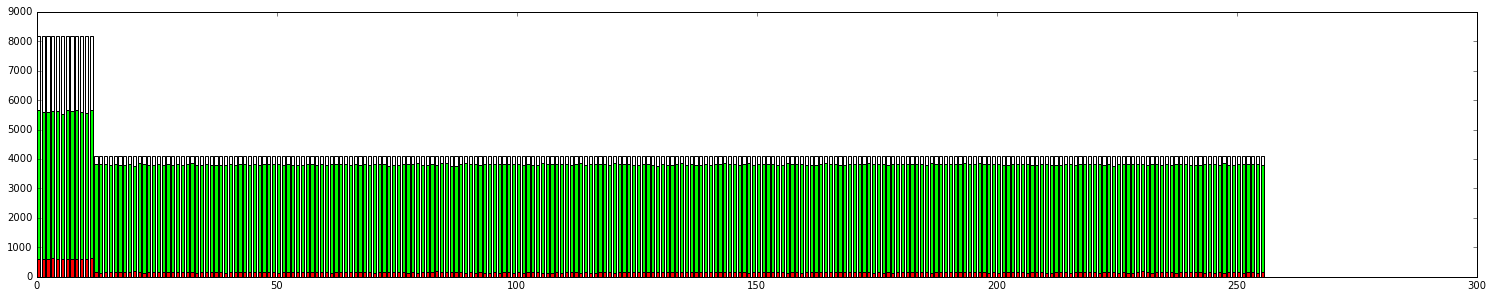

In [61]:
fig = plt.figure( figsize=(25,4.6) )
ax  = fig.add_axes( [0.1, 0.15, 0.8, 0.8] )

idx = get_index(256, 4, 1.1, 1000000)

plot(ax, bfs[idx], idx, "name")

print idx

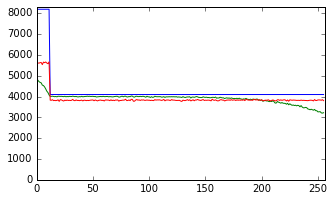

In [76]:
fig = plt.figure  (figsize=(5,3))
ax  = fig.add_axes([0.1,0.15,0.8,0.8])

idx  = get_index(256, 4, 1.1, 1)
ax.plot(range(256), bfs[idx]["space"])
ax.plot(range(256), bfs[idx]["used"])
idx2 = get_index(256, 4, 1.1, 1000000)
ax.plot(range(256), bfs[idx2]["used"])

ax.set_ylim([0,8300])
ax.set_xlim([0,256])

plt.savefig("../plots/Hist_256_4_110.pdf")
plt.show()